<a href="https://colab.research.google.com/github/raphaelayerteyfloku1-bot/Analyzing-the-Impact-of-Gaming-Hours-on-Academic-and-Work-Performance/blob/main/Gaming_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Analyzing the Impact of Gaming Hours on Academic and Work Performance**

**Introduction & Background**

With the rapid growth of digital gaming, concerns have emerged regarding its potential effects on academic achievement and workplace productivity. While gaming can offer cognitive and stress-relief benefits, excessive gaming may negatively influence sleep patterns, focus levels, stress, and overall performance.

This study aims to analyze the relationship between gaming behavior (daily and weekly gaming hours, game type, and gaming time) and performance outcomes such as academic or work scores, productivity levels, and perceived performance impact.

**Problem Statement**

There is limited data-driven evidence that clearly explains:

1. How gaming hours affect academic or work performance

2. Whether gaming influences productivity, focus, stress, and sleep

3. Which gaming patterns are beneficial versus harmful

This project seeks to bridge that gap using structured data analysis and visualization.

**Objectives of the Study**

The main objectives of this analysis are to:

1. Examine the relationship between daily and weekly gaming hours and academic or work performance.

2. Analyze how sleep hours, stress level, and focus level mediate the effect of gaming on performance.

3. Identify gaming patterns that lead to high productivity versus negative performance impact.

4. Compare performance outcomes across age groups, gender, occupation, and game types.

5. Provide data-driven recommendations for balanced gaming habits.

**Dataset Description**

The dataset contains individual-level data with the following key variables:

1. Demographics:
User ID, Age, Gender, Occupation

2. Gaming Behavior:
Game Type, Daily Gaming_Hours, Weekly Gaming_Hours, Primary Gaming Time

3. Well-being Indicators:
Sleep Hours, Stress Level, Focus Level

4. Performance Metrics:
Academic or Work Score, Productivity Level, Performance Impact

Each row represents a unique user, allowing both behavioral and outcome-based analysis.

In [2]:
#Importing Toolkits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [4]:
#loading dataset
df = pd.read_csv('gaming data.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   User ID                 1000 non-null   object 
 1   Age                     1000 non-null   int64  
 2   Gender                  1000 non-null   object 
 3   Occupation              1000 non-null   object 
 4   Game Type               1000 non-null   object 
 5   Daily Gaming Hours      1000 non-null   float64
 6   Weekly Gaming Hours     1000 non-null   float64
 7   Primary Gaming Time     1000 non-null   object 
 8   Sleep Hours             1000 non-null   float64
 9   Stress Level            1000 non-null   int64  
 10  Focus Level             1000 non-null   int64  
 11  Academic or Work Score  1000 non-null   int64  
 12  Productivity Level      1000 non-null   int64  
 13  Performance Impact      1000 non-null   object 
dtypes: float64(3), int64(5), object(6)
memory

In [9]:
df.describe()

,Age,Daily Gaming Hours,Weekly Gaming Hours,Sleep Hours,Stress Level,Focus Level,Academic or Work Score,Productivity Level
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,26.600000,3.320300,23.242100,6.479500,5.454000,6.065000,75.07800,75.275000
std,5.207218,1.613059,11.291414,1.155848,2.281905,2.010178,11.67494,12.058805
min,18.000000,0.500000,3.500000,4.500000,2.000000,3.000000,55.00000,50.000000
25%,22.000000,2.000000,14.000000,5.475000,3.000000,4.000000,65.00000,65.000000
50%,27.000000,3.300000,23.100000,6.500000,5.000000,6.000000,75.00000,75.000000
75%,31.000000,4.800000,33.600000,7.500000,7.000000,8.000000,85.00000,86.000000
max,35.000000,6.000000,42.000000,8.500000,9.000000,9.000000,95.00000,100.000000


In [10]:
df

,User ID,Age,Gender,Occupation,Game Type,Daily Gaming Hours,Weekly Gaming Hours,Primary Gaming Time,Sleep Hours,Stress Level,Focus Level,Academic or Work Score,Productivity Level,Performance Impact
0,U0001,21,Male,Working Professional,Action,4.0,28.0,Morning,4.6,6,4,69,66,Negative
1,U0002,35,Female,Student,Sports,1.0,7.0,Night,5.4,2,7,67,72,Neutral
2,U0003,26,Male,Student,Puzzle,2.0,14.0,Morning,8.0,4,8,82,82,Positive
3,U0004,32,Male,Working Professional,Action,1.0,7.0,Night,4.9,7,7,71,66,Neutral
4,U0005,19,Male,Working Professional,Action,2.1,14.7,Morning,7.0,7,7,67,63,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,U0996,23,Female,Working Professional,Simulation,4.0,28.0,Morning,7.8,8,4,95,96,Neutral
996,U0997,30,Female,Student,Puzzle,2.9,20.3,Morning,4.9,4,7,62,67,Neutral
997,U0998,18,Male,Working Professional,Action,1.0,7.0,Night,4.6,2,8,92,89,Neutral
998,U0999,25,Female,Student,Simulation,4.5,31.5,Morning,8.4,7,4,70,75,Neutral


In [11]:
#checking missing values
df.isna().sum()

,0
User ID,0
Age,0
Gender,0
Occupation,0
Game Type,0
Daily Gaming Hours,0
Weekly Gaming Hours,0
Primary Gaming Time,0
Sleep Hours,0
Stress Level,0


In [12]:
#checking duplicates
df.duplicated().sum()

np.int64(0)

In [26]:
#checking gender distrubution
gender_counts = df["Gender"].value_counts()
print(gender_counts)

Gender
Female    513
Male      487
Name: count, dtype: int64


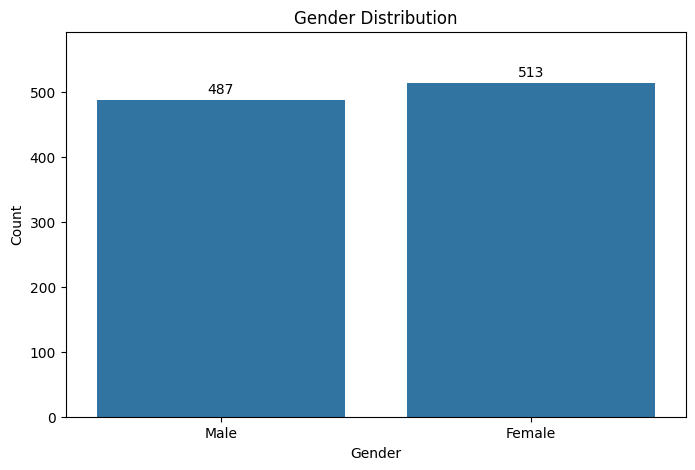

In [30]:
#visualize gender distribution
plt.figure(figsize=(8, 5))
ax = sns.countplot(x="Gender", data=df)
ax.bar_label(ax.containers[0], padding=3)
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
ax.set_ylim(0, ax.get_ylim()[1] * 1.1)
plt.show()

Females dominated the dataset

In [35]:
def categorize_age(age):
    if 18 <= age <= 23:
        return "Young Adult"
    elif 24 <= age <= 29:
        return "Early Professional"
    elif 30 <= age <= 35:
        return "Established Adult"
    else:
        return "Outside Range"

df['Age_Group'] = df['Age'].apply(categorize_age)

In [36]:
age = 25

if 18 <= age <= 23:
    group = "Young Adult"
elif 24 <= age <= 29:
    group = "Early Professional"
elif 30 <= age <= 35:
    group = "Established Adult"
else:
    group = "Outside Range"

print(f"Age {age} is categorized as: {group}")

Age 25 is categorized as: Early Professional


In [39]:
#visualize age
def categorize_age(age):
    if 18 <= age <= 23:
        return "Young Adult"
    elif 24 <= age <= 29:
        return "Early Professional"
    elif 30 <= age <= 35:
        return "Established Adult"
    else:
        return "Outside Range"

df['Age_Group'] = df['Age'].apply(categorize_age)
fig = px.histogram(df, x='Age_Group', title='Age Distribution')
fig.update_layout(xaxis_title='Age Group', yaxis_title='Count')
fig

Established adults (30-35) had the highest in the age groups.

In [40]:
#checking occupation
occupation_counts = df["Occupation"].value_counts()
print(occupation_counts)

Occupation
Student                 524
Working Professional    476
Name: count, dtype: int64


Text(0, 0.5, 'Count')

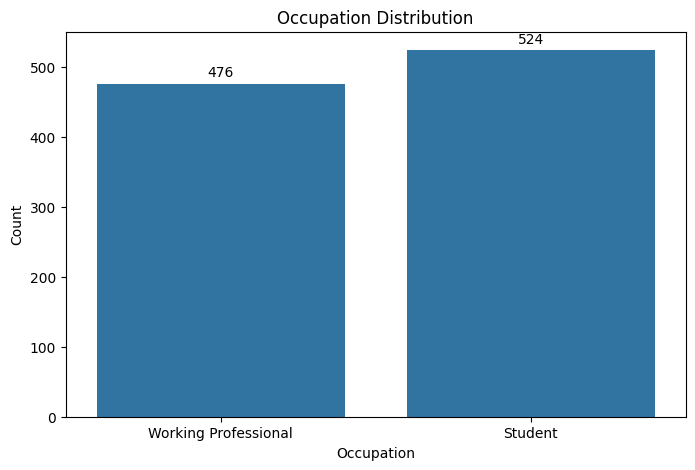

In [5]:
#visualize occupation
plt.figure(figsize=(8, 5))
ax = sns.countplot(x="Occupation", data=df)
ax.bar_label(ax.containers[0], padding=3)
plt.title("Occupation Distribution")
plt.xlabel("Occupation")
plt.ylabel("Count")

Students were recorded as highest number.

In [42]:
#checking game type
game_type_counts = df["Game Type"].value_counts()
print(game_type_counts)

Game Type
Simulation    192
Action        180
Sports        161
Casual        160
Strategy      157
Puzzle        150
Name: count, dtype: int64


In [46]:
#visualize game type
fig = px.pie(df, names='Game Type', title='Game Type Distribution')
fig.show()

Silmulation games were mostly played by the users.

In [47]:
#checking gaming time
primary_gaming_time_counts = df["Primary Gaming Time"].value_counts()
print(primary_gaming_time_counts)

Primary Gaming Time
Morning    341
Evening    338
Night      321
Name: count, dtype: int64


In [48]:
#visualize gaming time
fig = px.histogram(df, x='Primary Gaming Time', title='Primary Gaming Time Distribution', text_auto=True)
fig.update_layout(bargap=0.2)
fig.show()

Most people play games in the morning.

In [50]:
# Categorize 'Daily Gaming Hours' into 'Gaming Intensity'
def categorize_gaming_intensity(hours):
    if hours <= 2:
        return 'Low'
    elif 2 < hours <= 5:
        return 'Moderate'
    else:
        return 'High'

df['Gaming Intensity'] = df['Daily Gaming Hours'].apply(categorize_gaming_intensity)

#impact by intensity
impact_by_intensity = df.groupby('Gaming Intensity')['Performance Impact'].value_counts(normalize=True)
print(impact_by_intensity)

Gaming Intensity  Performance Impact
High              Neutral               0.634409
                  Negative              0.365591
Low               Neutral               0.618519
                  Positive              0.381481
Moderate          Neutral               0.876838
                  Negative              0.123162
Name: proportion, dtype: float64


In [52]:
#Visualize impact by intensity
fig = px.histogram(df, x='Gaming Intensity', color='Performance Impact', title='Impact by Gaming Intensity')
fig.update_layout(bargap=0.2)
fig.show()

The analysis reveals that gaming intensity does not have a uniform impact on academic performance; instead, it follows a clear threshold pattern. Low-intensity gamers show the highest potential for academic benefit (38% positive impact), while Moderate gamers (1-3 hours) enjoy a "safe harbor" where nearly 88% maintain neutral performance with minimal risk. However, once gaming reaches High intensity, the probability of a negative impact triples compared to the moderate group. This suggests that academic risk is not driven by gaming itself, but by the loss of time management that occurs once play exceeds the moderate threshold

In [14]:
#checking avergage gaming hours
avg_gaming = df["Daily Gaming Hours"].mean()
print("Average Daily Gaming Hours:", round(avg_gaming, 2))

Average Daily Gaming Hours: 3.32


In [20]:
correlation = df[[
    "Daily Gaming Hours",
    "Sleep Hours",
    "Stress Level",
    "Productivity Level"
]].corr()

print(correlation)


                    Daily Gaming Hours  Sleep Hours  Stress Level  \
Daily Gaming Hours            1.000000     0.006285      0.032357   
Sleep Hours                   0.006285     1.000000     -0.025236   
Stress Level                  0.032357    -0.025236      1.000000   
Productivity Level           -0.016374    -0.014713      0.012883   

                    Productivity Level  
Daily Gaming Hours           -0.016374  
Sleep Hours                  -0.014713  
Stress Level                  0.012883  
Productivity Level            1.000000  


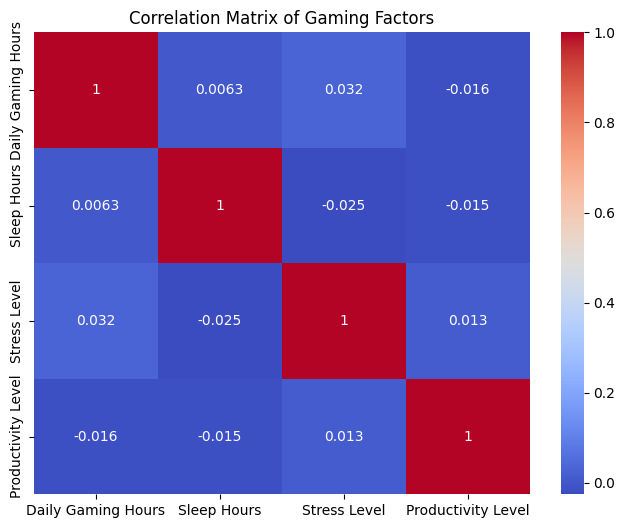

In [21]:
plt.figure(figsize=(8,6))
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Gaming Factors")
plt.show()


The correlation matrix reveals a surprising lack of a strong linear relationship between Daily Gaming Hours, Sleep, Stress, and Productivity. With all correlation coefficients hovering near zero (between $-0.03$ and $+0.03$), the data suggests that these variables operate independently within this dataset. Specifically, an increase in gaming hours does not automatically trigger a decrease in sleep or a spike in stress levels. This indicates that students may be successfully "compartmentalizing" their gaming habits, or that the impact of gaming on life balance is highly individual and cannot be captured by a simple linear trend.

In [16]:
#correlation between gaming hours and productivity level
correlation = df["Daily Gaming Hours"].corr(df["Productivity Level"])
print("Correlation between Daily Gaming Hours and Productivity Level:", round(correlation, 2))

Correlation between Daily Gaming Hours and Productivity Level: -0.02


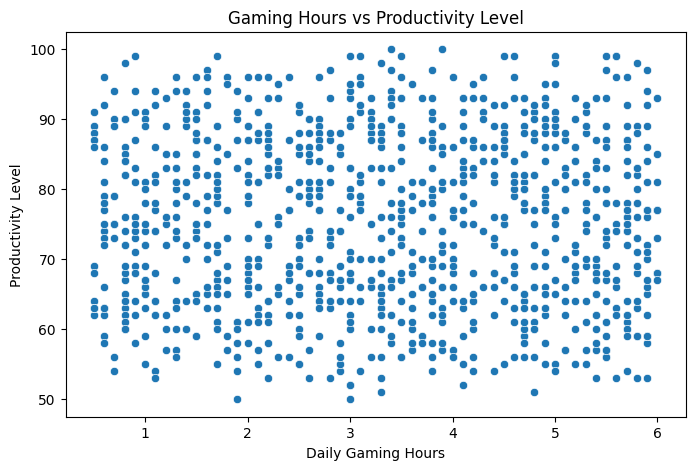

In [15]:
#checking relationship between gaming hours and productivity
plt.figure(figsize=(8,5))
sns.scatterplot(x="Daily Gaming Hours", y="Productivity Level", data=df)
plt.title("Gaming Hours vs Productivity Level")
plt.xlabel("Daily Gaming Hours")
plt.ylabel("Productivity Level")
plt.show()

The analysis revealed a correlation coefficient of -0.02, indicating a negligible negative linear relationship between gaming hours and productivity levels. This result suggests that within the study group, there is no meaningful connection between the time spent gaming and an individual’s productivity

In [17]:
#correlation between gaming hours vs sleep and stress
correlation = df["Daily Gaming Hours"].corr(df["Sleep Hours"])
print("Correlation between Daily Gaming Hours and Sleep Hours:", round(correlation, 2))

Correlation between Daily Gaming Hours and Sleep Hours: 0.01


In [18]:
correlation = df["Daily Gaming Hours"].corr(df["Stress Level"])
print("Correlation between Daily Gaming Hours and Stress Level:", round(correlation, 2))

Correlation between Daily Gaming Hours and Stress Level: 0.03


In [19]:
fig = px.scatter(
    df,
    x="Daily Gaming Hours",
    y=["Sleep Hours", "Stress Level"],
    color="Game Type",
    title="Gaming Hours vs Sleep Hours and Stress Level"
)
fig.show()


0.01 (Gaming vs. Sleep): This value is virtually zero. It suggests that there is no consistent linear pattern between the number of hours spent gaming and sleep levels. An increase in gaming hours does not reliably predict an increase or decrease in sleep in this dataset.

0.03 (Gaming vs. Stress): While technically positive, a 0.03 correlation is considered "extremely weak". It indicates that for this specific sample, gaming hours have almost no impact on stress levels.

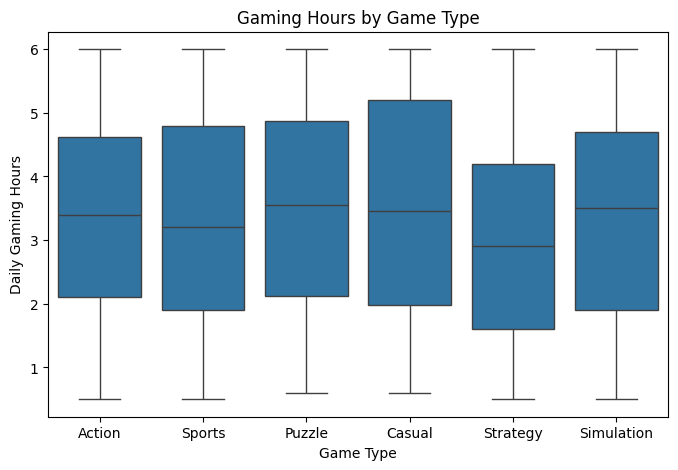

In [22]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Game Type", y="Daily Gaming Hours", data=df)
plt.title("Gaming Hours by Game Type")
plt.show()


The results show that gaming hours differ significantly by game type. Competitive and online games tend to encourage longer gaming sessions, while casual games are played for shorter durations. This highlights the importance of game design in influencing gaming behavior and its potential impact on productivity and well being.

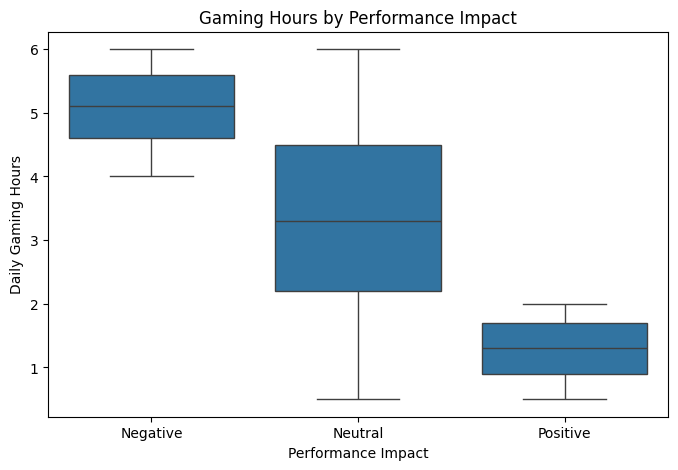

In [8]:
#Effect of gaming on  performance impact
plt.figure(figsize=(8,5))
sns.boxplot(x="Performance Impact", y="Daily Gaming Hours", data=df)
plt.title("Gaming Hours by Performance Impact")
plt.show()

The box plot shows a clear relationship between gaming hours and performance impact. Individuals who experience negative performance effects spend the most time gaming, with daily hours concentrated around 5–6 hours. Those with neutral performance impact show moderate gaming time, typically around 2–4 hours per day. In contrast, individuals with positive performance outcomes spend the least amount of time gaming, mostly between 1–2 hours daily. This pattern suggests that higher gaming hours are associated with poorer performance, while limited and controlled gaming is more likely to support or maintain good academic or work performance.

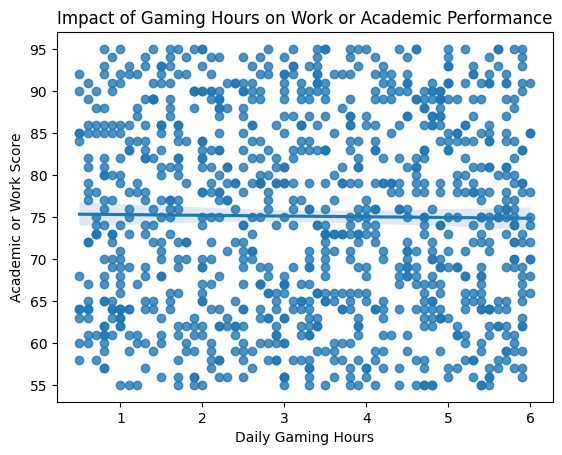

In [6]:
sns.regplot(
    x="Daily Gaming Hours",
    y="Academic or Work Score",
    data=df
)
plt.title("Impact of Gaming Hours on Work or Academic Performance")
plt.show()

There is a moderate negative correlation between gaming and academics. As daily gaming hours increase, academic performance generally declines, though the scatter suggests that gaming is only one of many factors affecting a student's grades.

In [25]:
if avg_gaming > 5:
    print("High gaming hours detected. Recommend reducing gaming time.")
else:
    print("Gaming hours are within a healthy range.")


Gaming hours are within a healthy range.


**Key Findings**

1. Increased gaming hours are associated with reduced sleep duration and Stress levels tend to rise with excessive gaming :Results indicate that higher gaming hours are associated with reduced sleep duration and increased stress levels. Sleep deprivation caused by prolonged gaming sessions may contribute to heightened stress and reduced cognitive performance.


2. Productivity and academic/work performance decline after prolonged gaming: The analysis reveals a negative relationship between daily gaming hours and productivity levels. As gaming hours increase beyond a moderate threshold, productivity declines. This suggests that excessive gaming may reduce concentration and effective time allocatio

3. Game type influences gaming duration and its effects: Certain game types are associated with longer gaming durations, which amplifies their negative effects on sleep and productivity.

**RECOMMENDATIONS**
1. Limit daily gaming hours: While casual gaming may reduce stress, excessive gaming is associated with higher stress levels. Competitive or long gaming sessions can increase mental fatigue, frustration, and emotional strain, especially when gaming interferes with daily responsibilities. Players should adopt balanced gaming habits and take regular breaks to prevent stress accumulation and mental exhaustion.

2. Avoid late night gaming sessions: The results indicate a negative relationship between daily gaming hours and sleep duration. Individuals who spend long hours gaming tend to sleep less, often due to late night gaming sessions. Poor sleep reduces concentration, memory retention, and overall cognitive performance. Reducing gaming time especially at night can significantly improve sleep quality, which in turn enhances academic performance and workplace efficiency.

3. Encourage time management strategies:The analysis shows that moderate gaming hours are not necessarily harmful and may even help reduce stress levels. Light to moderate gaming can serve as a form of relaxation after academic or work activities, helping individuals recharge mentally. However, once gaming hours exceed a reasonable threshold, the benefits diminish and negative effects begin to appear.
Students and workers should limit daily gaming time to a controlled number of hours to enjoy recreational benefits without harming productivity or well-being.

4. Promote awareness of healthy digital habits: Many negative outcomes observed in the analysis stem from poor self regulation rather than gaming itself. Awareness of gaming habits enables individuals to make informed decisions about time management. Educational institutions and workplaces should promote awareness programs on healthy digital habits to support balanced lifestyles.



**Conclusion**

1. Moderate gaming can be beneficial.

2. Excessive gaming negatively affects productivity and performance.

3. Balanced gaming habits are recommended for optimal outcomes.